<a href="https://colab.research.google.com/github/MariaG0205/Analisis-Numerico/blob/main/Ejercicios_Capitulo_4_AnalisisNum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import math
from scipy import optimize
!pip install sympy
import numpy as np
import sympy as sp
import cvxpy as cp
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#Librerias para impresión de imagenes
from mpl_toolkits.mplot3d import Axes3D 
from random import random, seed
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

**Función de gradiente descendiente**

In [11]:
def descent_grad_optim_step(x, f, grad, epsi, max_iter): #Gradiente descendiente paso optimizado  
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  for i in range(max_iter):
    g = grad(*x)
    def phi(s):
      params=x-s*g.T
      params=params[0,:]  #Cambiar una sola matriz
      return f(*params)
    alpha = optimize.fminbound(phi, 0, 10)
  
    x = x - alpha * g.T
    x=x[0,:]
 
    xs[i+1,:] = x

    tol = np.linalg.norm(g)
    if tol < epsi:
      
      break
  return xs,i+1

In [12]:
def descent_grad_fixed_step(x, grad, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  
  for i in range(max_iter):
      g=grad(*x)
      x = x - a * g.T
      x=x[0,:]
      xs[i+1,:] = x
      tol = np.linalg.norm(grad(*x))
      if tol < epsi:
        break
  return xs,i+1

**Función para gradiente descendiente y hessiano**

In [13]:
def gradient(f,*variables):
  n=len(variables)
  m=1
  grad=sp.zeros(n,m)
  i=0
  for var in variables:
    grad[i,0]=sp.diff(f,var)
    i+=1
  
  return grad

def hessian(f,*variables):
  n=len(variables)
  m=n
  hess=sp.zeros(n,m)
  
  for i in range(0,n):
    for j in range(0,n):
  
      first_diff=sp.diff(f,variables[j])
      second_diff=sp.diff(first_diff,variables[i])
      hess[i,j]=second_diff
  
  return hess

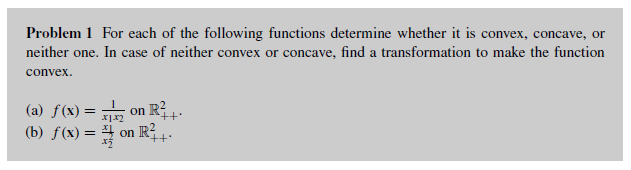

**Solución apartado A**

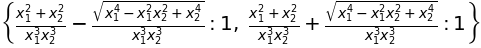

In [14]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=1/(x1*x2) 
grad=gradient(fx,x1,x2)
hess=hessian(fx,x1,x2)
grad_val=sp.lambdify([x1,x2],grad)
hess_val=sp.lambdify([x1,x2],hess)
sp.init_printing()
hess.eigenvals()

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


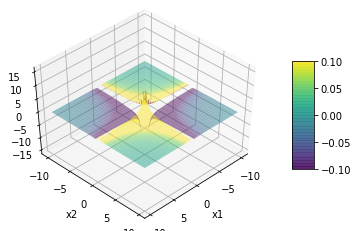

In [29]:
#Asignar los datos
xmax=10
dx=0.25
XX = np.arange(-xmax, xmax, dx)
YY= np.arange(-xmax, xmax, dx)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, cmap='viridis',alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

# Graficar en 3D
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


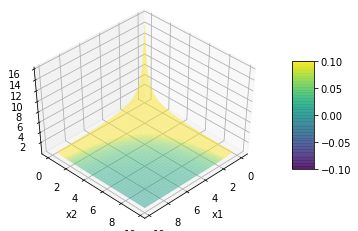

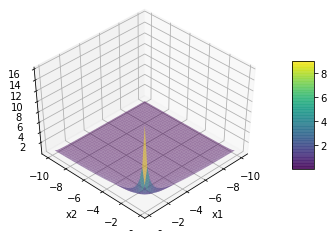

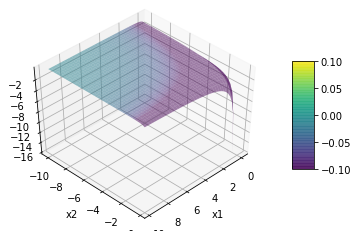

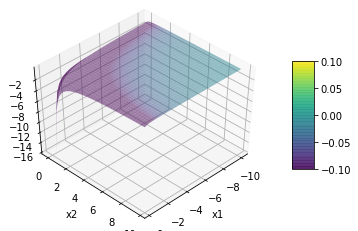

In [30]:
#Para realizar el analisis de cada sección:

xmax=10
dx=0.25
XX = np.arange(0, xmax, dx)
YY= np.arange(0, xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)


fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap='viridis',alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

XX = np.arange(-xmax,0, dx)
YY= np.arange(-xmax, 0, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap='viridis',alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

XX = np.arange(0,xmax, dx)
YY= np.arange(-xmax, 0, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap='viridis',alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

XX = np.arange(-xmax, 0, dx)
YY= np.arange(0,xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z,cmap='viridis',alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

**Solución apartado B**

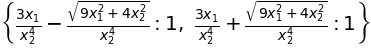

In [31]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=x1/(x2**2) 
grad=gradient(fx,x1,x2)
hess=hessian(fx,x1,x2)
grad_val=sp.lambdify([x1,x2],grad)
hess_val=sp.lambdify([x1,x2],hess)
sp.init_printing()
hess.eigenvals()

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


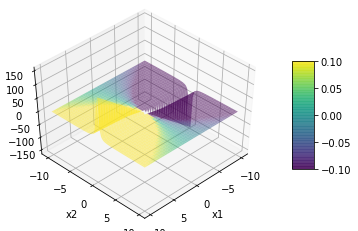

In [32]:
#Asignar los datos
xmax=10
dx=0.25
XX = np.arange(-xmax, xmax, dx)
YY= np.arange(-xmax, xmax, dx)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, cmap='viridis',alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

#Se grafica en plano 3D
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


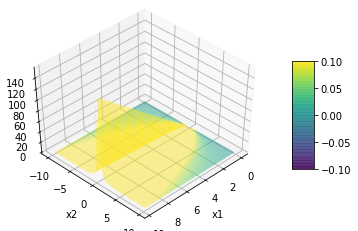

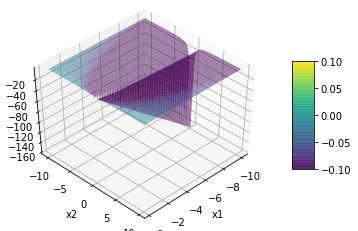

In [36]:
#Para realizar el analisis de cada sección:
xmax=10
dx=0.25


XX = np.arange(0, xmax, dx)
YY= np.arange(-xmax,xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap='viridis',alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

XX = np.arange(-xmax, 0, dx)
YY= np.arange(-xmax,xmax, dx)
X, Y = np.meshgrid(XX, YY)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap='viridis',alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

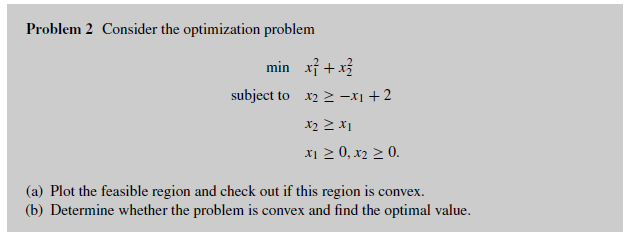

**Solución apartado A**

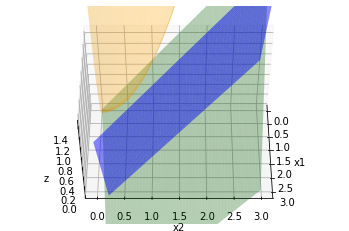

In [39]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=x1**2+x2**2
plane1=x1+x2-2 
plane2=x2-x1  
sp.init_printing()

#Asignar los datos.
dx=0.01
xmax=3
XX = np.arange(0, xmax, dx)#x1>=0
YY= np.arange(0, xmax, dx)#x2>=0

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)
P1=sp.lambdify([x1,x2],plane1)
P2=sp.lambdify([x1,x2],plane2)
Z=F(X,Y)
Z1=P1(X,Y)
Z2=P2(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf=ax.plot_surface(X, Y, Z, color='orange',alpha=0.3)
ax.plot_surface(X, Y, Z1,color='blue',alpha=0.5)
ax.plot_surface(X, Y, Z2,color='green',alpha=0.3)

#Se grafica en 3D
ax.view_init(50,0)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
ax.set_zlim(0, 1.5)#P>=0
plt.show()

**Solución apartado B**

In [43]:
n=1
x1=cp.Variable(1)
x2=cp.Variable(1)
cost=x1**2+x2**2
prob = cp.Problem(cp.Minimize(cost),
                  [x2>=-x1+2, x2>=x1, x2>=0, x1>=0])
prob.solve()


print("\n El valor optimo es \n", prob.value,"\n")
print("Una solución de x es")
print(f"x1= {x1.value},x2={x2.value}")


 El valor optimo es 
 2.000000000000001 

Una solución de x es
x1= [1.],x2=[1.]


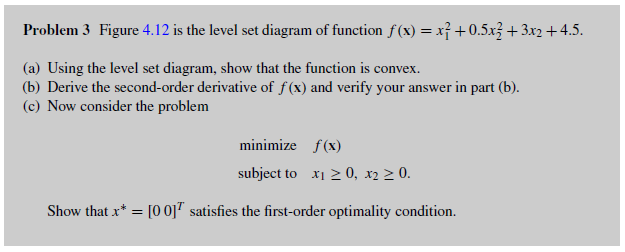

**Solución apartado A**

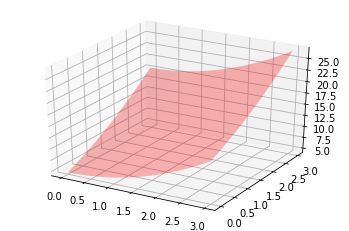

In [44]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=x1**2+0.5*x2**2+3*x2+4.5
dx=0.01
xmax=3
xmin=0
XX = np.arange(xmin, xmax, dx)#x1>=0
YY= np.arange(xmin, xmax, dx)#x2>=0
X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, color='red',alpha=0.3)

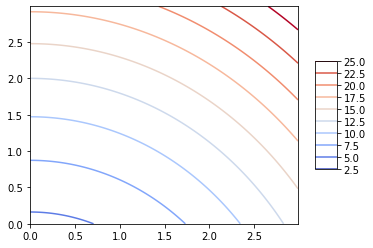

In [45]:
contour_levels=np.arange(25,0,-2.5)
#contour = plt.contour(X, Y,Z,np.flip(contour_levels))
contour = plt.contour(X, Y,Z,np.flip(contour_levels),cmap=cm.coolwarm)
plt.colorbar(contour, shrink=0.5, aspect=5)

**Solución apartado B**

In [46]:
hess=hessian(fx,x1,x2)
print('Criterio de la segunda derivada :\n',hess)
valores_propios=hess.eigenvals()
print('Los valores propios son: ',valores_propios,)
print('Como son positivos ambos estamos con una funcion con minimo')    

Criterio de la segunda derivada :
 Matrix([[2, 0], [0, 1.00000000000000]])
Los valores propios son:  {2: 1, 1.00000000000000: 1} ...osea 2 y 1
Como son positivos ambos estamos con una funcion con minimo


**Solución apartado C**

In [47]:
#Optimización
n=1
x1=cp.Variable(1)
x2=cp.Variable(1)
cost=x1**2+0.5*x2**2+3*x2+4.5
prob = cp.Problem(cp.Minimize(cost), [x2>=0, x1>=0])
prob.solve()


print("\n El valor optimo es \n", prob.value,"\n")
print("Una solución de x es")
print(f"x1= {x1.value},x2={x2.value}")


 El valor optimo es 
 4.5 

Una solución de x es
x1= [0.],x2=[2.96289305e-25]
